In [1]:
import string         #(module for string)
import sys            #(module system)
import numpy as np    #(module mathematical stuff)
import fileinput
import math
import operator
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import scipy
import itertools

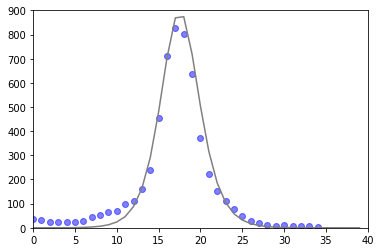

In [2]:
#Incidence of seasonal influenza epidemic, France 2014-2015 
#source: Franch National sourveillance network, 
#réseau Sentinelles, INSERM/Sorbonne Université, https://www.sentiweb.fr

inc={39:(201523,4),38:(201522,7),37:(201521, 9),36:(201520,7),35:(201519,10),34:(201518,6),33:(201517,10),32:(201516,19),31:(201515,30),
   30:(201514,48),29:(201513,77),28:(201512,109),27:(201511,154),26:(201510,223),25:(201509,370),24:(201508,635),23:(201507,802),
   22:(201506,827),21:(201505,710),20:(201504,453),19:(201503,239),18:(201502,161),17:(201501,110),16:(201452,98),15:(201451,71),
   14:(201450,66),13:(201449,52),12:(201448,44),11:(201447,28),10:(201446,23),9:(201445,25),8:(201444,24),
    7:(201443,25),6:(201442,34),5:(201441,35)}
#inc= dictionary with a dummy variable as key and a pair as value 
#the pair contains the yearweek in the first position and 
#the number of new cases per 100000 inhabitants in the second

#better storing incidence data
incidence_data=[] 
week_data=[] 
for t in range(5,40):
    incidence_data.append(inc[t][1])
    week_data.append(inc[t][0])
    
    
N= 67000000 #French population
beta= 0.5 #transmissibility
mu= 0.3 #recovery rate
I0= 40 #initial infectious
det_rate=0.15 #proportion of cases that are seen

Tmax= 100000 # maximum number of timesteps for the numerical integration

S_det=[] #vectors of Susceptible
I_det=[] #vectors of Infetious
R_det=[] #vectors of Recovered
incidence_det=[] # vector of incidence 

#Initial conditions 
I_det.append(I0)
R_det.append(int(0.2*N))
S_det.append(N-I0-R_det[0])
incidence_det.append(0.)

#Computing SIR trajectories
for t in range(Tmax):
    
    #deterministic (Euler method)
    FOI= beta*float(I_det[t])/float(N)
    infected= S_det[t]*FOI
    recovered= I_det[t]*mu
    incidence_det.append(infected) 
    
    S_det.append(S_det[t]-infected)
    I_det.append(I_det[t]+infected-recovered)
    R_det.append(R_det[t]+recovered)
    
    if I_det[t+1]<= 1:
        break

#aggregating simulated incidence weekly and rescaling to have incidence per 100000
incidence_simulations=[sum([float(i)/float(N)*100000*det_rate for i in incidence_det[t*7:t*7+7]]) for t in range(40)]

plt.figure()
plt.plot(incidence_data, "o", color = 'blue', alpha=0.5, label='data')
plt.plot(incidence_simulations, color = 'gray', alpha=1, label='simulations')
plt.xlim(0,40)
plt.ylim(0,900)
plt.show()
plt.close() 


In [3]:
#SIR - STOCHASTIC SIMULATION

N= 100000 #Population
beta= 0.4 #transmissibility
mu= 0.2 #recovery rate
I0= 5 #initial infectious
R0= N*0.1
Tmax= 100 #maximum number of time steps 

#initialisation of the compartments
S=[] 
I=[]
R=[]
incidence=[] #new infected
S.append(N-I0-R0) #we assume all susceptibles except for I0 individuals that are initially infectious 
I.append(I0)
R.append(R0) #no individual is immune
incidence.append(0)

for t in range(Tmax):
    
    FOI= beta*float(I[t])/float(N) #compute the Force of Infection (FOI)
    infected= np.random.binomial(S[t], FOI)
    recovered= np.random.binomial(I[t], mu)
    
    S.append(S[t]-infected)
    I.append(I[t]+infected-recovered)
    R.append(R[t]+recovered)
    incidence.append(infected)
    
    if I[t+1]<= 0: # when there no infectious the epidemic ends 
        break
    

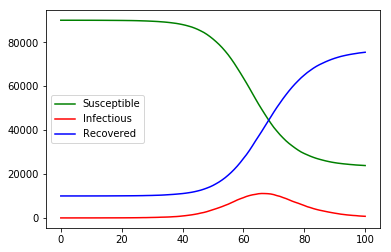

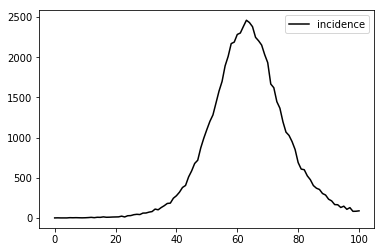

In [4]:
#PLOT THE RESULTS
plt.figure()
plt.plot(S, color = 'green', alpha=1, label='Susceptible')
plt.plot(I, color = 'red', alpha=1, label='Infectious')
plt.plot(R, color = 'blue', alpha=1, label='Recovered')
plt.legend()
plt.show()
plt.close()  

plt.figure()
plt.plot(incidence, color = 'black', alpha=1, label='incidence')
plt.legend()
plt.show()
plt.close()  

In [5]:
#SIR - COMPARISON BETWEEN STOCHASTIC AND DETERMINISTIC SIMULATION


S=[] 
I=[]
R=[]
incidence=[] 
S_det=[] 
I_det=[]
R_det=[]
incidence_det=[] 

S.append(N-I0)
I.append(I0)
R.append(0)
S_det.append(N-I0)
I_det.append(I0)
R_det.append(0)
incidence_det.append(0)

for t in range(Tmax):
    
    #stochastic
    FOI= beta*float(I[t])/float(N)
    infected= np.random.binomial(S[t], FOI)
    recovered= np.random.binomial(I[t], mu)
    
    S.append(S[t]-infected)
    I.append(I[t]+infected-recovered)
    R.append(R[t]+recovered)
    incidence.append(infected)
    
    #deterministic (Euler method)
    FOI= beta*float(I_det[t])/float(N)
    infected= S_det[t]*FOI
    recovered= I_det[t]*mu
    
    S_det.append(S_det[t]-infected)
    I_det.append(I_det[t]+infected-recovered)
    R_det.append(R_det[t]+recovered)
    incidence_det.append(infected)
    
    if I[t+1]<= 0:
        break
    

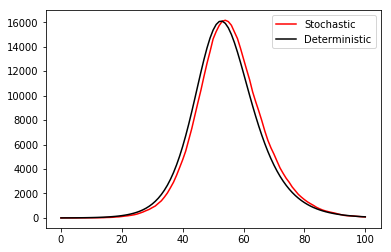

In [6]:
plt.figure()
plt.plot(I, color = 'red', alpha=1, label='Stochastic')
plt.plot(I_det, color = 'black', alpha=1, label='Deterministic')
plt.legend()
plt.show()
plt.close()  

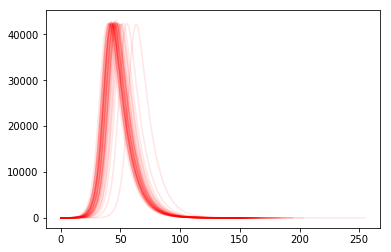

In [7]:
#SIR - RUN MULTIPLE STOCHASTIC SIMULATIONS

N= 100000 #Population
beta= 0.4 #transmissibility
mu= 0.1 #recovery rate
I0= 2 #initial infectious

Tmax= 100000

plt.figure()
for n in range(50):
    S=[] 
    I=[]
    R=[]
    incidence=[]
    S.append(N-I0)
    I.append(I0)
    R.append(0)
    incidence.append(0)

    for t in range(Tmax):

        FOI= beta*float(I[t])/float(N)
        infected= np.random.binomial(S[t], FOI)
        recovered= np.random.binomial(I[t], mu)

        S.append(S[t]-infected)
        I.append(I[t]+infected-recovered)
        R.append(R[t]+recovered)
        incidence.append(infected)

        if I[t+1]<= 0:
            break
            
    plt.plot(I, color = 'red', alpha=0.1, label='Simulation')
#plt.xlim(0,80)
plt.show()
plt.close() 

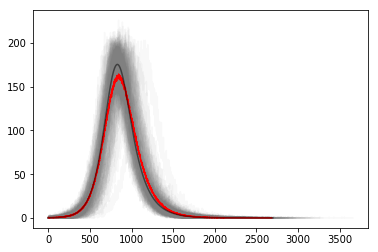

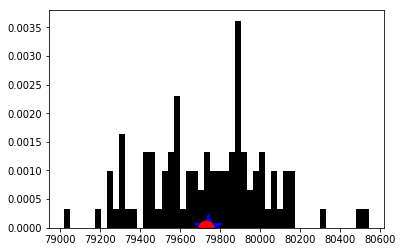

In [8]:
#SIR - RUN MULTIPLE STOCHASTIC SIMULATIONS WITH SOME STATISTICS

N= 100000 #Population
beta= 0.02 #transmissibility
mu= 0.01 #recovery rate
I0= 10 #initial infectious

Tmax= 1000000
nrun= 100

final_size=[]

incidence_av= [0]*Tmax

plt.figure()
for n in range(nrun):
    S=[] 
    I=[]
    R=[]
    incidence=[]
    S.append(N-I0)
    I.append(I0)
    R.append(0)
    incidence.append(0)
    
    final_size_n= 0
    for t in range(Tmax):

        FOI= beta*float(I[t])/float(N)
        infected= np.random.binomial(S[t], FOI)
        recovered= np.random.binomial(I[t], mu)

        S.append(S[t]-infected)
        I.append(I[t]+infected-recovered)
        R.append(R[t]+recovered)
        incidence.append(infected)
        final_size_n+= infected
        
        incidence_av[t]+= incidence[t]

        if I[t+1]<= 0:
            break
            
    final_size.append(final_size_n)
    plt.plot(incidence, color = 'gray', alpha=0.05)
 
final_size_av= (1.0*sum(final_size))/(1.0*len(final_size))
incidence_av_norm= [float(i)/float(nrun) for i in incidence_av if float(i)/float(nrun)>0]
plt.plot(incidence_av_norm, color = 'red', alpha=1)

S_det=[] 
I_det=[]
R_det=[]
incidence_det=[]
S_det.append(N-I0)
I_det.append(I0)
R_det.append(0)
final_size_det=0
for t in range(Tmax):
    FOI= beta*float(I_det[t])/float(N)
    infected= S_det[t]*FOI
    recovered= I_det[t]*mu

    S_det.append(S_det[t]-infected)
    I_det.append(I_det[t]+infected-recovered)
    R_det.append(R_det[t]+recovered)
    incidence_det.append(infected)
    final_size_det+= infected

    if I_det[t+1]<= 1:
        break

plt.plot(incidence_det, color = 'black', alpha=0.5)

#plt.xlim(0,700)
plt.show()
plt.close() 

plt.figure()
plt.hist(final_size, normed=True, bins=50, color= 'black')
plt.plot([final_size_av], [0], "*", color = 'blue', markersize=30)
plt.plot([final_size_det], [0], "o", color = 'red', markersize=15)
#add here the analytical result to compare
plt.show()
plt.close()

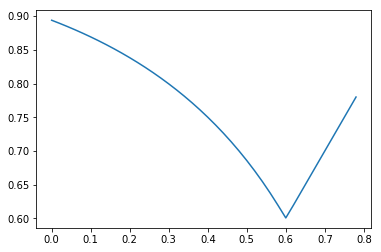

In [17]:
N= 67000000 #French population
beta= 0.05 #transmissibility
mu= 0.02 #recovery rate
I0= 40 #initial infectious

Tmax= 100000 # maximum number of timesteps for the numerical integration


#Initial conditions 
Rinit_vec= [0.02*i for i in range(40)]
Rfinal_tot_vec= []
for Rinit in Rinit_vec:
    S_det=[] #vectors of Susceptible
    I_det=[] #vectors of Infetious
    R_det=[] #vectors of Recovered
    incidence_det=[] # vector of incidence 

    I_det.append(I0)
    R_det.append(int(Rinit*N))
    S_det.append(N-I0-R_det[0])
    incidence_det.append(0.)

    final_size_det=0
    for t in range(Tmax):

        #deterministic
        FOI= beta*float(I_det[t])/float(N)
        infected= S_det[t]*FOI
        recovered= I_det[t]*mu
        incidence_det.append(infected) 

        S_det.append(S_det[t]-infected)
        I_det.append(I_det[t]+infected-recovered)
        R_det.append(R_det[t]+recovered)
        
        final_size_det+= infected
    
    Rfinal_tot= float(final_size_det)/float(N)+Rinit
    Rfinal_tot_vec.append(Rfinal_tot)

        
plt.figure()
plt.plot(Rinit_vec, Rfinal_tot_vec)
plt.show()
plt.close()